In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bandit import Bandits_one
from mab import EpsilonGreedy, UCB

# Part 2 - Report

### Exercise 8

In [2]:
env = Bandits_one()

experiments = 20
episodes = 1000

mean_cumulative_reward = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

mean_cumulative_regret = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

First we run the Epsilon-greedy MAB algorithm on the environment for 1000 episodes, 20 times.

In [3]:
# Epsilon-greedy model
print("Training Epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for _ in range(experiments):
    agent = EpsilonGreedy()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        agent.update(action, reward)

        cumulative_reward += reward
        mean_cumulative_regret["epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_reward["epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

print("Mean cumulative reward: %.2f" %mean_cumulative_reward["epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regret["epsilon-greedy"][-1])

Training Epsilon-greedy model for 1000 episodes over 20 experiments
Mean cumulative reward: 2708.00
Mean cumulative regret: 292.00


Then we run decaying Epsilon-greedy model the same number of times.

In [4]:
# Decaying epsilon-greedy model
print("Training Decaying epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for _ in range(experiments):
    agent = EpsilonGreedy(alpha=0.99)
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        agent.update(action, reward)

        cumulative_reward += reward
        mean_cumulative_regret["decaying epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_reward["decaying epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

print("Mean cumulative reward: %.2f" %mean_cumulative_reward["decaying epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regret["decaying epsilon-greedy"][-1])

Training Decaying epsilon-greedy model for 1000 episodes over 20 experiments
Mean cumulative reward: 2974.77
Mean cumulative regret: 25.23


Finally run the UCB model the same number of times.

In [5]:
# UCB model
print("Training UCB model for", episodes, "episodes over", experiments, "experiments")
for _ in range(experiments):
    agent = UCB()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        action = agent.sample(episode)
        observation, reward, terminated, truncated, info = env.step(action)

        agent.update(action, reward)

        cumulative_reward += reward
        mean_cumulative_regret["ucb"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_reward["ucb"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

print("Mean cumulative reward: %.2f" %mean_cumulative_reward["ucb"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regret["ucb"][-1])

Training UCB model for 1000 episodes over 20 experiments
Mean cumulative reward: 2987.10
Mean cumulative regret: 12.90


Plot the different models' cumulative regret.

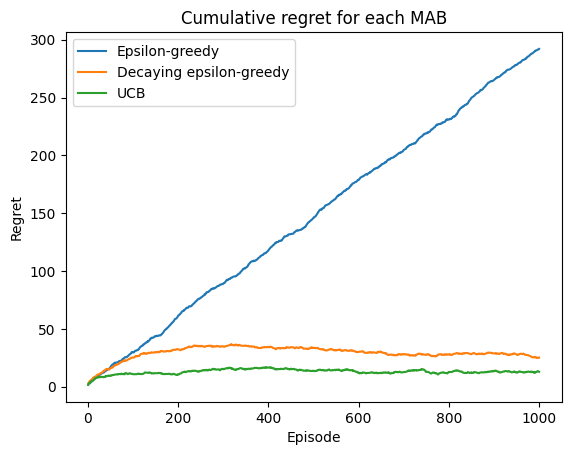

In [6]:
plt.plot(np.arange(1, episodes+1), mean_cumulative_regret["epsilon-greedy"], label="Epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regret["decaying epsilon-greedy"], label="Decaying epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regret["ucb"], label="UCB")

plt.title("Cumulative regret for each MAB")
plt.ylabel("Regret")
plt.xlabel("Episode")

plt.legend()
plt.show()

------------------------------------------
### 4. (*)

Yes, this does match the asymptotic behaviour presented in class.

We can see that the normal Epsilon-greedy model (blue) has linear regret, whilst both the Decaying epsilon-greedy model (orange) and the UCB model (green) have logarithmic asymptotic regret.

This is easily explained by their exploration behaviour, as the normal Epsilon-greedy model continues exploring at the same rate all the time, regardless of how many episodes it has been running for. The Decaying epsilon-greedy model and the UCB model both gradually stop exploring the more sure they are that they've correctly sampled the expected reward of each action.

------------------------------------------